In [657]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

options(repr.plot.width = 13.0, repr.plot.height = 13.0)

[1] "playground-series-s3e25"

# **Import**

In [658]:
library(dplyr)
library(psych)
library(ggplot2)
library(gridExtra)
library(ggcorrplot)

# **1. Data Import & Structure**

In [659]:
train <- read.csv('/kaggle/input/playground-series-s3e25/train.csv')
test <- read.csv('/kaggle/input/playground-series-s3e25/test.csv')

In [660]:
str(train)

'data.frame':	10407 obs. of  13 variables:
 $ id                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ allelectrons_Total   : num  100 100 76 100 116 131 50 30 120 97 ...
 $ density_Total        : num  0.842 7.558 8.886 8.795 9.578 ...
 $ allelectrons_Average : num  10 10 15.6 10 11.6 ...
 $ val_e_Average        : num  4.8 4.8 5.6 4.8 4.8 ...
 $ atomicweight_Average : num  20.6 20.3 33.7 20.2 25 ...
 $ ionenergy_Average    : num  11.1 12 12.1 10.9 11.8 ...
 $ el_neg_chi_Average   : num  2.77 2.75 2.83 2.65 2.77 ...
 $ R_vdw_element_Average: num  1.73 1.63 1.79 1.63 1.68 ...
 $ R_cov_element_Average: num  0.86 0.91 0.864 0.936 0.896 ...
 $ zaratio_Average      : num  0.496 0.493 0.481 0.489 0.493 ...
 $ density_Average      : num  0.915 0.718 1.506 0.789 1.865 ...
 $ Hardness             : num  6 6.5 2.5 6 6 6 2 4 6 5.8 ...


In [661]:
str(test)

'data.frame':	6939 obs. of  12 variables:
 $ id                   : int  10407 10408 10409 10410 10411 10412 10413 10414 10415 10416 ...
 $ allelectrons_Total   : num  884 90 116 100 55 124 66 98 220 120 ...
 $ density_Total        : num  121.42 9.93 7.77 9.11 4.03 ...
 $ allelectrons_Average : num  35.4 18 11.6 10 11 ...
 $ val_e_Average        : num  5.28 5.6 4.8 4.8 4 4.8 4 4.8 5.5 5 ...
 $ atomicweight_Average : num  82.6 39.6 23.2 20.3 23 ...
 $ ionenergy_Average    : num  9.37 12.09 11.02 12.09 11.28 ...
 $ el_neg_chi_Average   : num  2.3 2.87 2.64 2.83 2.46 ...
 $ R_vdw_element_Average: num  1.91 1.65 1.79 1.66 1.75 ...
 $ R_cov_element_Average: num  1.2 0.864 0.96 0.792 0.893 ...
 $ zaratio_Average      : num  0.462 0.476 0.5 0.496 0.476 ...
 $ density_Average      : num  1.795 1.412 0.788 1.205 0.935 ...


In [662]:
describe(train)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,10407,5203.0000000,3.004386e+03,5203.0000000,5203.0000000,3.857725e+03,0,10406.00000,10406.00000,0.0000000,-1.200346,2.945052e+01
allelectrons_Total,2,10407,128.0535157,2.241238e+02,100.0000000,104.1970313,4.744320e+01,0,15300.00000,15300.00000,39.9219517,2381.821623,2.196975e+00
density_Total,3,10407,14.4913417,1.597288e+01,10.6500000,12.0411670,6.055163e+00,0,643.09380,643.09380,9.7620355,258.986094,1.565743e-01
allelectrons_Average,4,10407,17.0332222,1.046873e+01,12.6000000,15.2108445,4.892580e+00,0,67.00000,67.00000,1.6596752,2.737960,1.026199e-01
val_e_Average,5,10407,4.5467888,6.908635e-01,4.7142857,4.5872538,4.236000e-01,0,6.00000,6.00000,-2.3473213,12.485013,6.772196e-03
atomicweight_Average,6,10407,37.5077028,2.601231e+01,26.2038268,32.7045551,1.117203e+01,0,167.40000,167.40000,1.7971067,3.328678,2.549859e-01
ionenergy_Average,7,10407,10.9383083,1.408276e+00,11.2027600,11.0778013,7.667488e-01,0,15.24581,15.24581,-3.5476921,24.715499,1.380463e-02
el_neg_chi_Average,8,10407,2.6076620,3.349058e-01,2.7060000,2.6533214,1.749468e-01,0,3.44300,3.44300,-3.4658181,22.159165,3.282917e-03
R_vdw_element_Average,9,10407,1.7313302,1.924811e-01,1.7327273,1.7425970,9.380815e-02,0,2.25000,2.25000,-4.6708810,40.667603,1.886798e-03


In [663]:
describe(test)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,6939,1.387600e+04,2.003261e+03,13876.00000,1.387600e+04,2572.3110000,10407,17345.000000,6938.000000,0.0000000,-1.200519,2.404856e+01
allelectrons_Total,2,6939,1.264601e+02,2.075645e+02,100.00000,1.037692e+02,47.4432000,0,10116.000000,10116.000000,33.3767188,1554.705105,2.491751e+00
density_Total,3,6939,1.479402e+01,1.898245e+01,10.65000,1.200415e+01,5.9037132,0,643.093804,643.093804,12.6789905,313.079467,2.278787e-01
allelectrons_Average,4,6939,1.740619e+01,1.099609e+01,12.66667,1.540154e+01,4.6949000,0,67.000000,67.000000,1.6756873,2.663586,1.320048e-01
val_e_Average,5,6939,4.546852e+00,6.831581e-01,4.75000,4.583685e+00,0.3706500,0,6.000000,6.000000,-2.1270083,11.212917,8.201112e-03
atomicweight_Average,6,6939,3.842279e+01,2.734435e+01,26.20383,3.314288e+01,11.1720303,0,167.400000,167.400000,1.8060933,3.222564,3.282609e-01
ionenergy_Average,7,6939,1.092151e+01,1.378980e+00,11.20276,1.105434e+01,0.7447693,0,15.245810,15.245810,-3.3120059,23.310018,1.655426e-02
el_neg_chi_Average,8,6939,2.608119e+00,3.228734e-01,2.70600,2.651574e+00,0.1779120,0,3.443000,3.443000,-3.2144921,20.533986,3.876000e-03
R_vdw_element_Average,9,6939,1.737907e+00,1.905843e-01,1.73600,1.746894e+00,0.0941451,0,2.250000,2.250000,-4.5843259,40.837732,2.287908e-03


**Check missing value**

In [664]:
colSums(is.na(train))

id    allelectrons_Total         density_Total 
                    0                     0                     0 
 allelectrons_Average         val_e_Average  atomicweight_Average 
                    0                     0                     0 
    ionenergy_Average    el_neg_chi_Average R_vdw_element_Average 
                    0                     0                     0 
R_cov_element_Average       zaratio_Average       density_Average 
                    0                     0                     0 
             Hardness 
                    0

In [665]:
colSums(is.na(test))

id    allelectrons_Total         density_Total 
                    0                     0                     0 
 allelectrons_Average         val_e_Average  atomicweight_Average 
                    0                     0                     0 
    ionenergy_Average    el_neg_chi_Average R_vdw_element_Average 
                    0                     0                     0 
R_cov_element_Average       zaratio_Average       density_Average 
                    0                     0                     0

**Duplicate check**

In [666]:
sum(duplicated(train))

[1] 0

In [667]:
sum(duplicated(test))

[1] 0

In [668]:
head(train)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,100,0.841611,10.00000,4.800000,20.61253,11.08810,2.766000,1.732000,0.8600000,0.4960700,0.91457,6.0
2,1,100,7.558488,10.00000,4.800000,20.29889,12.04083,2.755000,1.631000,0.9100000,0.4927190,0.71760,6.5
3,2,76,8.885992,15.60000,5.600000,33.73926,12.08630,2.828000,1.788000,0.8640000,0.4814780,1.50633,2.5
4,3,100,8.795296,10.00000,4.800000,20.21335,10.94850,2.648000,1.626000,0.9360000,0.4892720,0.78937,6.0
5,4,116,9.577996,11.60000,4.800000,24.98813,11.82448,2.766000,1.682000,0.8960000,0.4927360,1.86481,6.0
6,5,131,24.529328,21.83333,4.666667,50.13150,11.94820,2.858333,1.758333,0.8966667,0.4663883,2.94712,6.0


In [669]:
head(test)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10407,884,121.420000,35.36,5.28,82.56124,9.370384,2.298000,1.9072,1.2000000,0.4618992,1.79459
2,10408,90,9.931960,18.00,5.60,39.56806,12.086300,2.868000,1.6520,0.8640000,0.4761960,1.41194
3,10409,116,7.767992,11.60,4.80,23.23182,11.023840,2.644000,1.7940,0.9600000,0.4995140,0.78834
4,10410,100,9.107996,10.00,4.80,20.29889,12.086300,2.828000,1.6620,0.7920000,0.4957955,1.20466
5,10411,55,4.030000,11.00,4.00,22.97767,11.280950,2.455000,1.7500,0.8933333,0.4760950,0.93456
6,10412,124,19.334000,20.20,4.80,47.98569,11.631880,2.926667,1.7650,0.9800000,0.4683433,4.57578


# **2. Data Visualization**

**Train is used for data visualization.**

**Histogram**

In [670]:
p1 <- ggplot(train, aes(x= allelectrons_Total)) + geom_histogram(fill = 'skyblue',bins = 30) + theme_bw() + ggtitle('allelectrons_Total histogram')

p2 <- ggplot(train, aes(x= density_Total)) + geom_histogram(fill = 'blue',bins = 30) + theme_bw() + ggtitle('density_Total histogram')

p3 <- ggplot(train, aes(x= allelectrons_Average)) + geom_histogram(fill = 'orange',bins = 30) + theme_bw() + ggtitle('allelectrons_Average histogram')

p4 <- ggplot(train, aes(x= val_e_Average)) + geom_histogram(fill = 'green',bins = 30) + theme_bw() + ggtitle('val_e_Average histogram')

p5 <- ggplot(train, aes(x= atomicweight_Average)) + geom_histogram(fill = 'yellow',bins = 30) + theme_bw() + ggtitle('aatomicweight_Average histogram')

p6 <- ggplot(train, aes(x= ionenergy_Average)) + geom_histogram(fill = 'pink',bins = 30) + theme_bw() + ggtitle('ionenergy_Average histogram')

p7 <- ggplot(train, aes(x= el_neg_chi_Average)) + geom_histogram(fill = 'yellowgreen',bins = 30) + theme_bw() + ggtitle('el_neg_chi_Average histogram')

p8 <- ggplot(train, aes(x= R_vdw_element_Average)) + geom_histogram(fill = 'skyblue',bins = 30) + theme_bw() + ggtitle('R_vdw_element_Average histogram')

p9 <- ggplot(train, aes(x= R_cov_element_Average)) + geom_histogram(fill = 'red',bins = 30) + theme_bw() + ggtitle('R_cov_element_Average histogram')

p10 <- ggplot(train, aes(x= zaratio_Average)) + geom_histogram(fill = 'yellow',bins = 30) + theme_bw() + ggtitle('zaratio_Average histogram')

p11 <- ggplot(train, aes(x= density_Average)) + geom_histogram(fill = 'violet',bins = 30) + theme_bw() + ggtitle('density_Average histogram')

p12 <- ggplot(train, aes(x= Hardness)) + geom_histogram(fill = 'green',bins = 30) + theme_bw() + ggtitle('Hardness histogram')

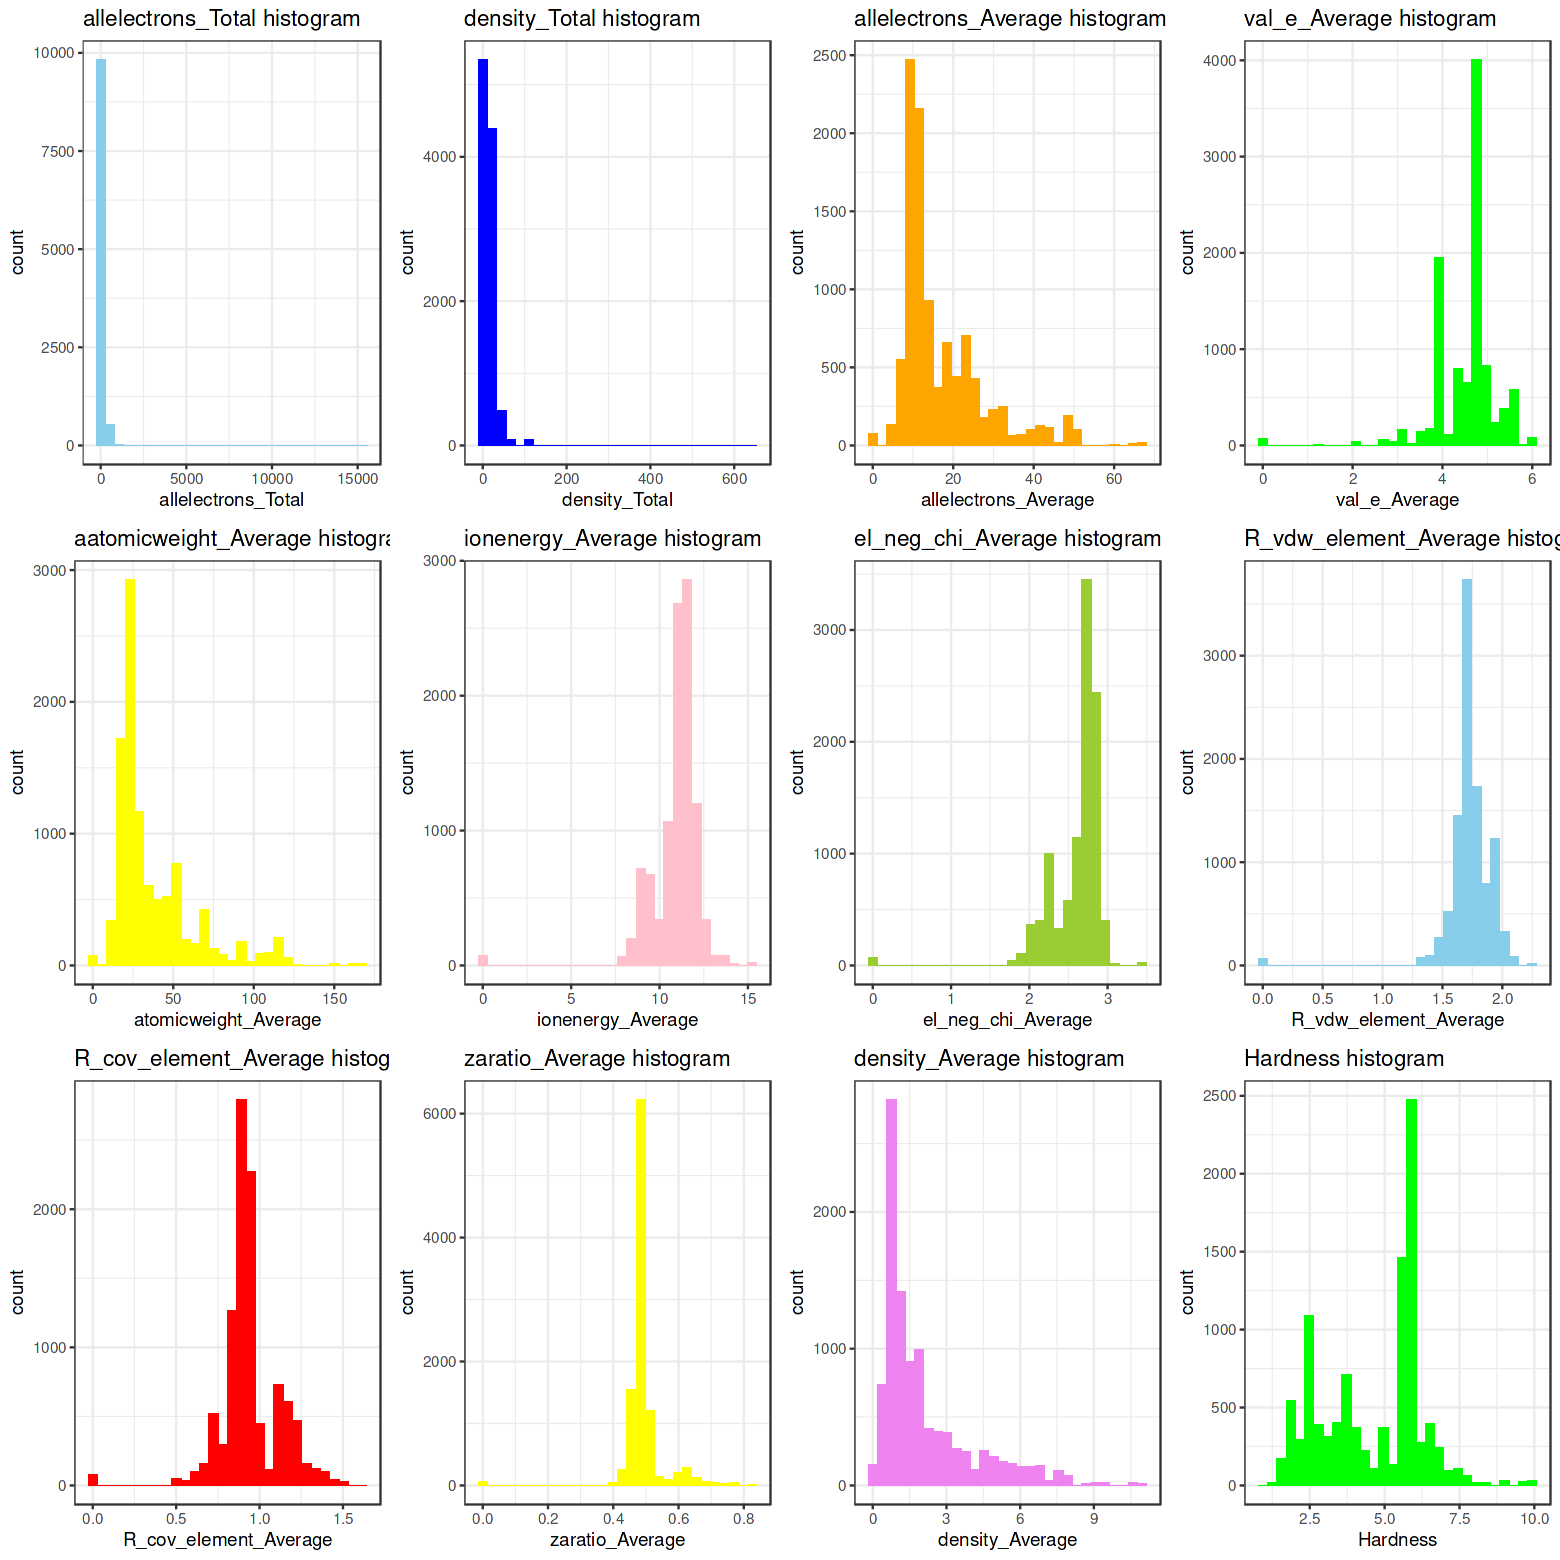

In [671]:
grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12, ncol = 4)

------------

**Boxplot**

In [672]:
p1 <- ggplot(train, aes(x= allelectrons_Total)) + geom_boxplot(fill = 'skyblue') + theme_bw() + ggtitle('allelectrons_Total boxplot')

p2 <- ggplot(train, aes(x= density_Total)) + geom_boxplot(fill = 'blue') + theme_bw() + ggtitle('density_Total boxplot')

p3 <- ggplot(train, aes(x= allelectrons_Average)) + geom_boxplot(fill = 'orange') + theme_bw() + ggtitle('allelectrons_Average boxplot')

p4 <- ggplot(train, aes(x= val_e_Average)) + geom_boxplot(fill = 'green') + theme_bw() + ggtitle('val_e_Average boxplot')

p5 <- ggplot(train, aes(x= atomicweight_Average)) + geom_boxplot(fill = 'yellow') + theme_bw() + ggtitle('aatomicweight_Average boxplot')

p6 <- ggplot(train, aes(x= ionenergy_Average)) + geom_boxplot(fill = 'pink') + theme_bw() + ggtitle('ionenergy_Average boxplot')

p7 <- ggplot(train, aes(x= el_neg_chi_Average)) + geom_boxplot(fill = 'yellowgreen') + theme_bw() + ggtitle('el_neg_chi_Average boxplot')

p8 <- ggplot(train, aes(x= R_vdw_element_Average)) + geom_boxplot(fill = 'skyblue') + theme_bw() + ggtitle('R_vdw_element_Average boxplot')

p9 <- ggplot(train, aes(x= R_cov_element_Average)) + geom_boxplot(fill = 'red') + theme_bw() + ggtitle('R_cov_element_Average boxplot')

p10 <- ggplot(train, aes(x= zaratio_Average)) + geom_boxplot(fill = 'yellow') + theme_bw() + ggtitle('zaratio_Average boxplot')

p11 <- ggplot(train, aes(x= density_Average)) + geom_boxplot(fill = 'violet') + theme_bw() + ggtitle('density_Average boxplot')

p12 <- ggplot(train, aes(x= Hardness)) + geom_boxplot(fill = 'green') + theme_bw() + ggtitle('Hardness boxplot')

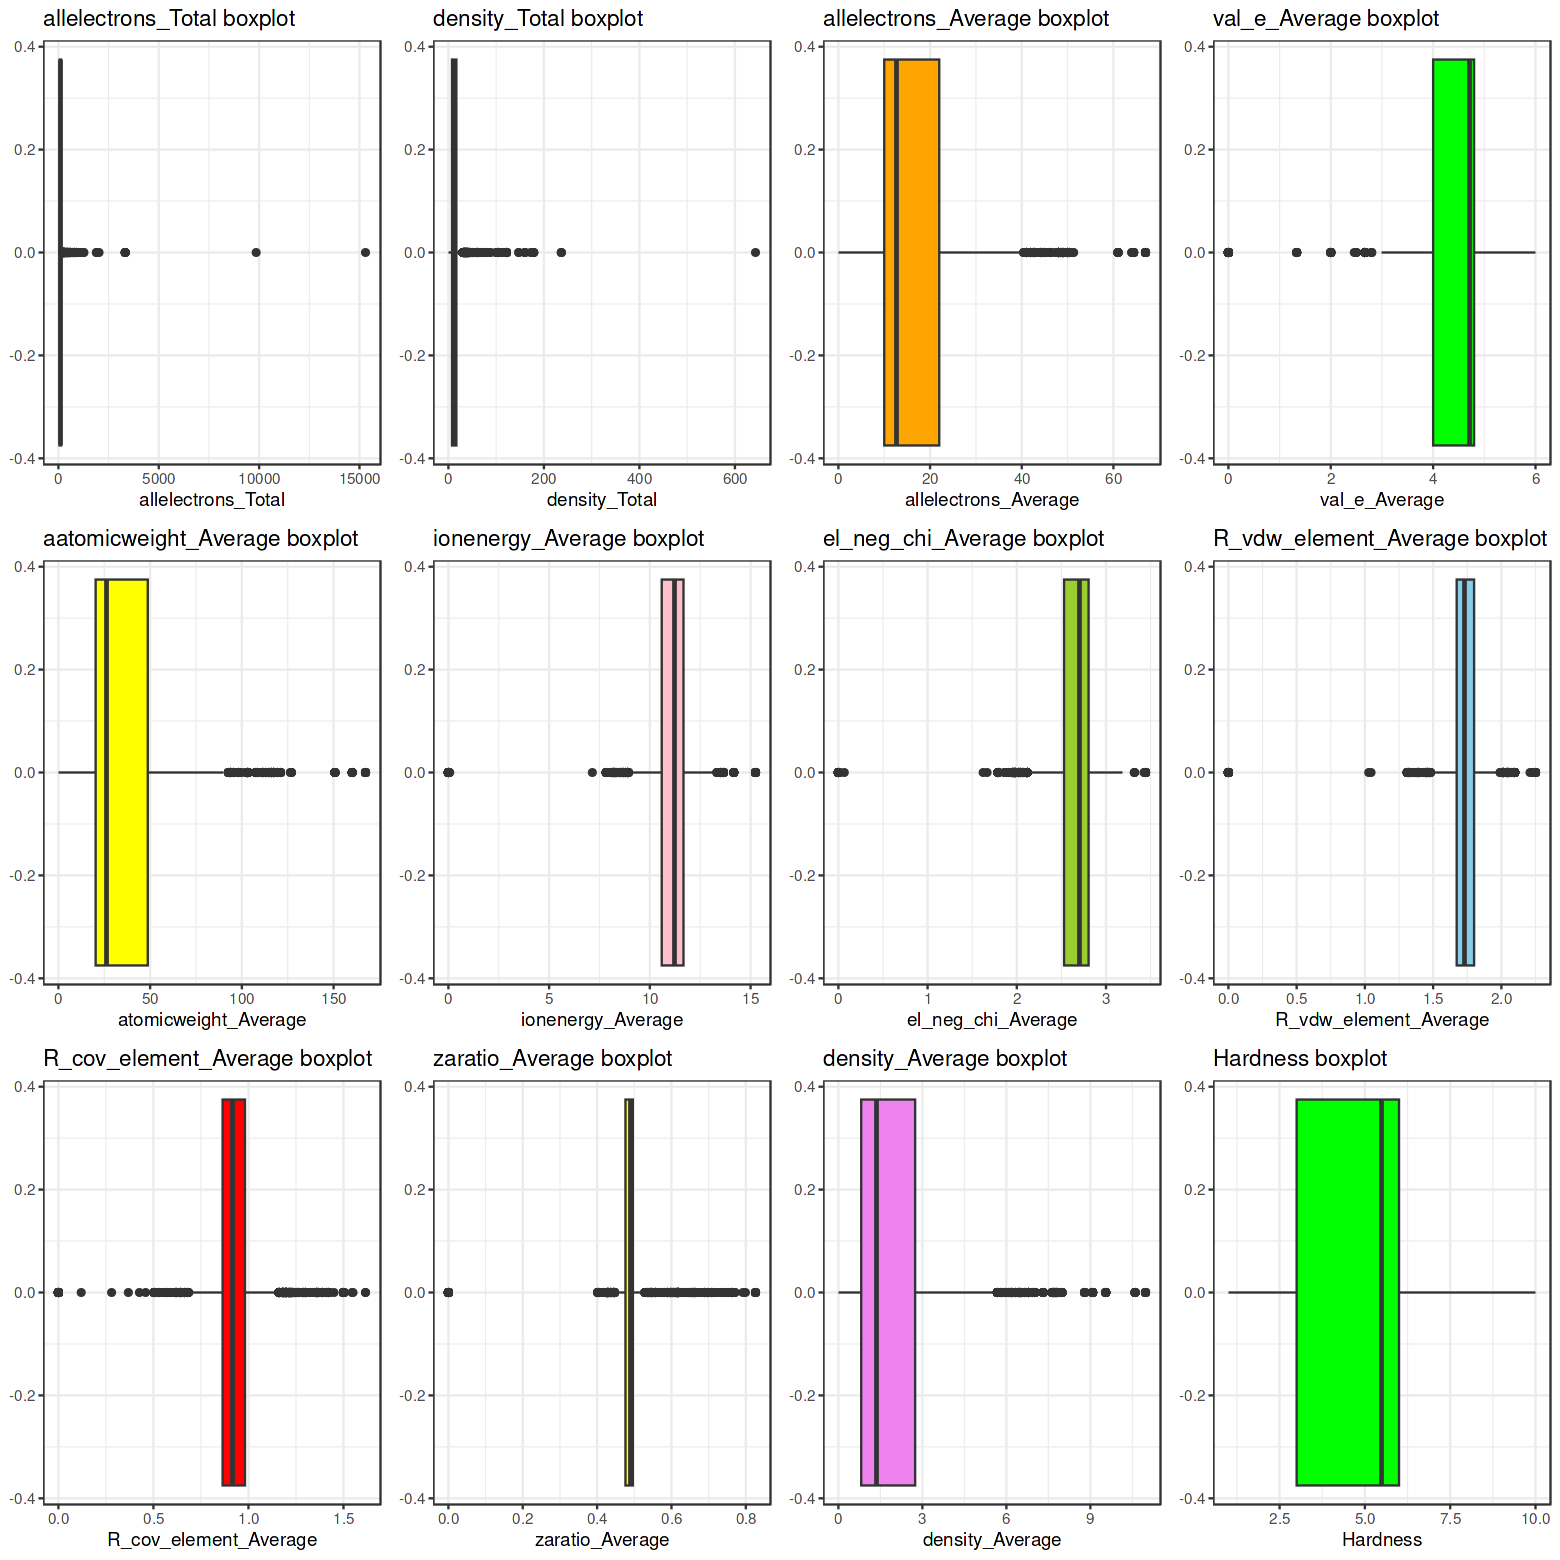

In [673]:
grid.arrange(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12, ncol = 4)

------------

**Correlation**

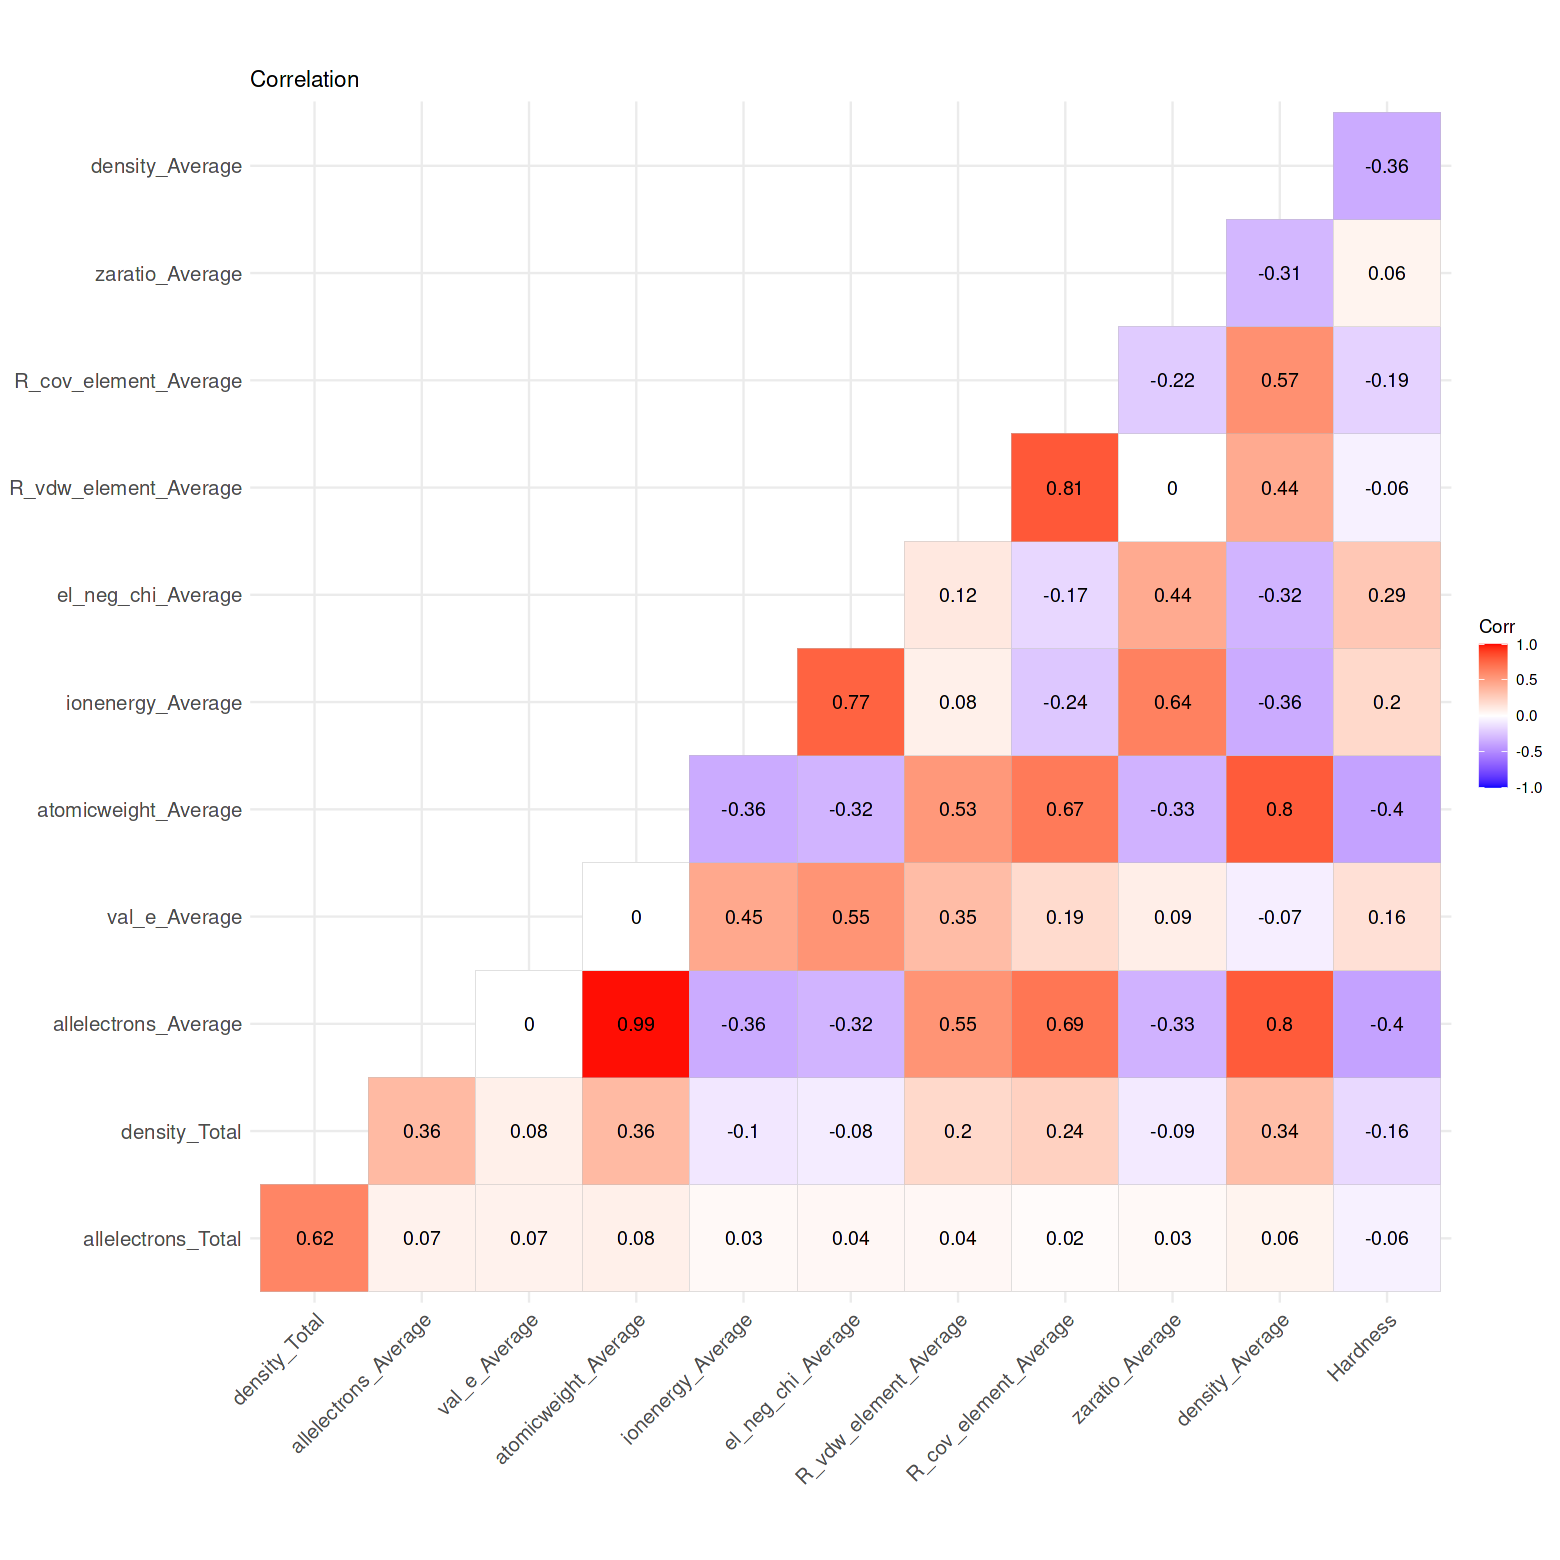

In [674]:
ggcorrplot(cor(train[,-1]) , type = "lower", lab=T, title = 'Correlation')

-----------

# **3. Modeling**

In [675]:
library(Metrics)
library(caret)

In [676]:
train<- train[,-1]
test <- test[,-1]

In [677]:
head(train)

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,100,0.841611,10.00000,4.800000,20.61253,11.08810,2.766000,1.732000,0.8600000,0.4960700,0.91457,6.0
2,100,7.558488,10.00000,4.800000,20.29889,12.04083,2.755000,1.631000,0.9100000,0.4927190,0.71760,6.5
3,76,8.885992,15.60000,5.600000,33.73926,12.08630,2.828000,1.788000,0.8640000,0.4814780,1.50633,2.5
4,100,8.795296,10.00000,4.800000,20.21335,10.94850,2.648000,1.626000,0.9360000,0.4892720,0.78937,6.0
5,116,9.577996,11.60000,4.800000,24.98813,11.82448,2.766000,1.682000,0.8960000,0.4927360,1.86481,6.0
6,131,24.529328,21.83333,4.666667,50.13150,11.94820,2.858333,1.758333,0.8966667,0.4663883,2.94712,6.0


In [678]:
head(test)

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,884,121.420000,35.36,5.28,82.56124,9.370384,2.298000,1.9072,1.2000000,0.4618992,1.79459
2,90,9.931960,18.00,5.60,39.56806,12.086300,2.868000,1.6520,0.8640000,0.4761960,1.41194
3,116,7.767992,11.60,4.80,23.23182,11.023840,2.644000,1.7940,0.9600000,0.4995140,0.78834
4,100,9.107996,10.00,4.80,20.29889,12.086300,2.828000,1.6620,0.7920000,0.4957955,1.20466
5,55,4.030000,11.00,4.00,22.97767,11.280950,2.455000,1.7500,0.8933333,0.4760950,0.93456
6,124,19.334000,20.20,4.80,47.98569,11.631880,2.926667,1.7650,0.9800000,0.4683433,4.57578


**Remove outliers**

In [679]:
for(i in range(1,12)){
    Q1 = quantile(train[,i],c(0.25),na.rm = T)
    Q3 = quantile(train[,i],c(0.75),na.rm = T)
    median = median(train[,i],na.rm=T)
    
    lowwer = Q1 - 1.5 * (Q3 - Q1)
    upper = Q1 + 1.5 * (Q3 - Q1)
    
    train[,i] <- ifelse((train[,i] < lowwer) | (train[,i] > upper) , median, train[,i])
}

In [680]:
for(i in range(1,11)){
    Q1 = quantile(test[,i],c(0.25),na.rm = T)
    Q3 = quantile(test[,i],c(0.75),na.rm = T)
    median = median(test[,i],na.rm=T)
    
    lowwer = Q1 - 1.5 * (Q3 - Q1)
    upper = Q1 + 1.5 * (Q3 - Q1)
    
    test[,i] <- ifelse((test[,i] < lowwer) | (test[,i] > upper) , median, test[,i])
}

**Linear Regression**

In [681]:
LR <- lm(Hardness ~ ., train)

In [682]:
summary(LR)


Call:
lm(formula = Hardness ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6083 -1.0071  0.3307  0.9474  5.5454 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.1471028  0.1688271  18.641  < 2e-16 ***
allelectrons_Total     0.0046131  0.0004821   9.569  < 2e-16 ***
density_Total         -0.0031620  0.0009280  -3.407 0.000659 ***
allelectrons_Average  -0.0271577  0.0099730  -2.723 0.006478 ** 
val_e_Average          0.0369681  0.0263450   1.403 0.160579    
atomicweight_Average  -0.0159141  0.0038479  -4.136 3.56e-05 ***
ionenergy_Average     -0.0986270  0.0184546  -5.344 9.27e-08 ***
el_neg_chi_Average     1.0290443  0.0695621  14.793  < 2e-16 ***
R_vdw_element_Average  1.7917878  0.1409033  12.716  < 2e-16 ***
R_cov_element_Average -0.4182987  0.1601325  -2.612 0.009009 ** 
zaratio_Average       -4.3852375  0.2926948 -14.982  < 2e-16 ***
density_Average       -0.0828067  0.0118746  -6.973 3.28e-12 **

**\'val_e_Average\' is not statistically significant. Therefore remove it.**


**Select Variables(Using Back ward)**

In [683]:
step(LR)

Start:  AIC=6556.56
Hardness ~ allelectrons_Total + density_Total + allelectrons_Average + 
    val_e_Average + atomicweight_Average + ionenergy_Average + 
    el_neg_chi_Average + R_vdw_element_Average + R_cov_element_Average + 
    zaratio_Average + density_Average

                        Df Sum of Sq   RSS    AIC
- val_e_Average          1      3.69 19499 6556.5
<none>                               19496 6556.6
- R_cov_element_Average  1     12.80 19508 6561.4
- allelectrons_Average   1     13.91 19510 6562.0
- density_Total          1     21.77 19517 6566.2
- atomicweight_Average   1     32.08 19528 6571.7
- ionenergy_Average      1     53.57 19549 6583.1
- density_Average        1     91.20 19587 6603.1
- allelectrons_Total     1    171.72 19667 6645.8
- R_vdw_element_Average  1    303.28 19799 6715.2
- el_neg_chi_Average     1    410.43 19906 6771.4
- zaratio_Average        1    420.99 19917 6776.9

Step:  AIC=6556.53
Hardness ~ allelectrons_Total + density_Total + allelectrons_


Call:
lm(formula = Hardness ~ allelectrons_Total + density_Total + 
    allelectrons_Average + atomicweight_Average + ionenergy_Average + 
    el_neg_chi_Average + R_vdw_element_Average + R_cov_element_Average + 
    zaratio_Average + density_Average, data = train)

Coefficients:
          (Intercept)     allelectrons_Total          density_Total  
             3.165328               0.004686              -0.003059  
 allelectrons_Average   atomicweight_Average      ionenergy_Average  
            -0.027441              -0.015812              -0.093329  
   el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  
             1.059533               1.812446              -0.391123  
      zaratio_Average        density_Average  
            -4.491691              -0.084395  


In [684]:
LR <- lm(Hardness ~ allelectrons_Total + density_Total + 
    allelectrons_Average + atomicweight_Average + ionenergy_Average + 
    el_neg_chi_Average + R_vdw_element_Average + R_cov_element_Average + 
    zaratio_Average + density_Average, data = train)

In [685]:
summary(LR)


Call:
lm(formula = Hardness ~ allelectrons_Total + density_Total + 
    allelectrons_Average + atomicweight_Average + ionenergy_Average + 
    el_neg_chi_Average + R_vdw_element_Average + R_cov_element_Average + 
    zaratio_Average + density_Average, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7424 -1.0076  0.3296  0.9483  5.5803 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.1653277  0.1683346  18.804  < 2e-16 ***
allelectrons_Total     0.0046856  0.0004793   9.775  < 2e-16 ***
density_Total         -0.0030593  0.0009252  -3.307 0.000947 ***
allelectrons_Average  -0.0274412  0.0099714  -2.752 0.005934 ** 
atomicweight_Average  -0.0158122  0.0038473  -4.110 3.99e-05 ***
ionenergy_Average     -0.0933293  0.0180651  -5.166 2.43e-07 ***
el_neg_chi_Average     1.0595325  0.0660849  16.033  < 2e-16 ***
R_vdw_element_Average  1.8124465  0.1401386  12.933  < 2e-16 ***
R_cov_element_Average -0.3911231  0.158

In [686]:
print(LR[1])

$coefficients
          (Intercept)    allelectrons_Total         density_Total 
          3.165327676           0.004685587          -0.003059273 
 allelectrons_Average  atomicweight_Average     ionenergy_Average 
         -0.027441218          -0.015812213          -0.093329325 
   el_neg_chi_Average R_vdw_element_Average R_cov_element_Average 
          1.059532541           1.812446489          -0.391123081 
      zaratio_Average       density_Average 
         -4.491690676          -0.084395207 



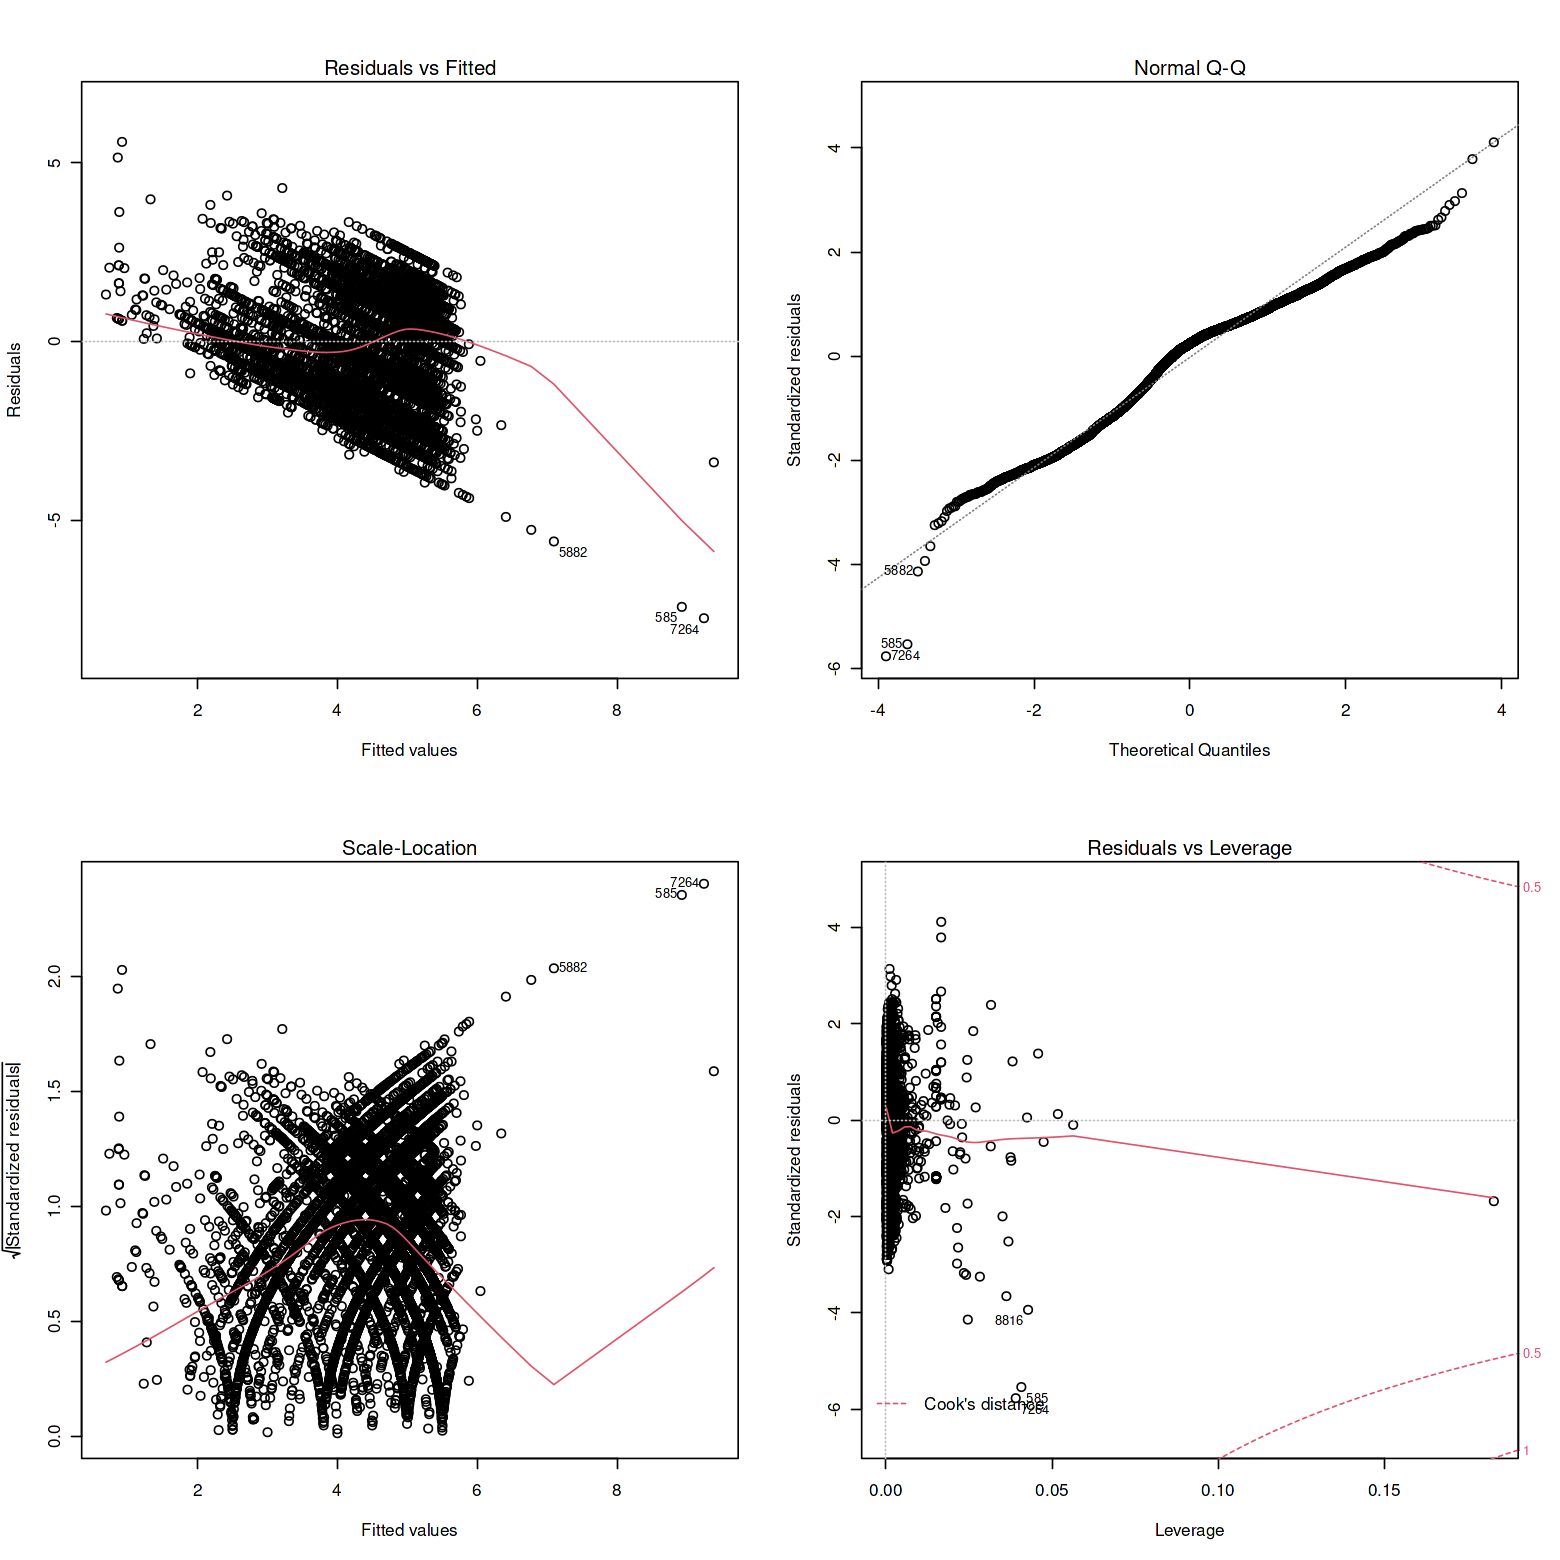

In [687]:
par(mfrow=c(2,2))
plot(LR)

In [688]:
pred <- round(predict(LR,train),2)

In [689]:
head(pred)

1    2    3    4    5    6 
5.42 5.14 5.01 5.11 5.12 4.72

In [690]:
mse(train$Hardness, pred)

[1] 1.873531

In [691]:
mae(train$Hardness,pred)

[1] 1.124976

In [693]:
R2(train$Hardness,pred)

[1] 0.2586348

In [694]:
MEDAE <- median(abs(train$Hardness - pred))

In [695]:
MEDAE

[1] 0.97

In [696]:
pred <- round(predict(LR,test),2)

In [697]:
head(pred)

1    2    3    4    5    6 
3.31 4.75 5.34 5.25 4.90 4.99

In [698]:
test <- read.csv('/kaggle/input/playground-series-s3e25/test.csv')

In [699]:
sub <- as.data.frame(test['id'])

In [700]:
sub$Hardness <- pred

In [701]:
head(sub)

,id,Hardness
,<int>,<dbl>
1,10407,3.31
2,10408,4.75
3,10409,5.34
4,10410,5.25
5,10411,4.90
6,10412,4.99


In [702]:
write.csv(sub,'submission.csv')

-----------

**Please leave your advice in the comments. Thank you**